
Импорт пакетов



In [1]:
import numpy as np
import math
from functools import reduce
from copy import deepcopy
import matplotlib.pyplot as plt

Вентили 

In [2]:
H = np.array([[1/math.sqrt(2),1/math.sqrt(2)],[1/math.sqrt(2),-1/math.sqrt(2)]])
X = np.array([[0,1],[1,0]])
I = np.array([[1,0],[0,1]])

In [3]:
CNOT = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])

Функция унитарного оператора действующего на 1 кубит

In [4]:
def UnitGate(q, matrix, q0):
  qubit = deepcopy(q)
  for i in range(len(qubit)):
    if (i % (1<<(q0+1))) < (1<<(q0)):
      r = 0
    else:
      r = 1
    qubit[i] = q[i|(1<<q0)] * matrix[r][1] + q[(i|(1<<q0))^(1<<q0)] * matrix[r][0]
  return qubit

Функция унитарного оператора действующего на 2 кубита

In [5]:
def UnitGatetwo(q,matrix,q1,q0):
  qubit = deepcopy(q)
  for i in range(len(q)):
    if (i % (1<<(q0+1))) < (1<<(q0)):
      r1 = 0
    else:
      r1 = 1
    if (i %(1<<(q1+1))) < (1<<(q1)):
      r2 = 0
    else:
      r2 = 1
    qubit[i] = q[(i|(1<<q0))|(1<<q1)] * matrix[2*r2 +r1][3]  \
    + q[((i|(1<<q0))|(1<<q1))^(1<<q0)] * matrix[2*r2 +r1][2] \
    + q[((i|(1<<q0))|(1<<q1))^(1<<q1)] * matrix[2*r2 +r1][1] \
    + q[(((i|(1<<q0)|(1<<q1))^(1<<q1))^(1<<q0))] * matrix[2*r2 +r1][0]
  return qubit

Вывод битовой строчки по числу

In [6]:
# Перевод i кубита по счету в битовую запись размера n
# Ввод (n) - количество кубит, (i) - номер кубита 
# вывод int запись бита
def inttobit(n, i):
    return list(map(int, list(format(i, "0{0}b".format(n)))))

**Алгоритм Бернштейна - Вазирани**

функция оракула

In [7]:
def BernshteinOracul(qubit, s):
  qubit2 = deepcopy(qubit)
  for i in range(len(s)):
    if s[len(s)-i-1] == '1':
      qubit2 = UnitGatetwo(qubit2,CNOT,i, len(s))
  return qubit2

секретная битовая строка

In [9]:
s = list(input())
qubit = np.zeros((2**(len(s)+1)))
qubit[1<<len(s)] = 1

1011


Шаг блоков адамара

In [10]:
for i in range((len(s)+1)):
  qubit = UnitGate(qubit,H, i)

Шаг оракула

In [11]:
qubit = BernshteinOracul(qubit, s)

Шаг блоков адамара без последнего кубита

In [12]:
for i in range((len(s))):
  qubit = UnitGate(qubit,H, i)

Измерение

In [16]:
o = qubit**2
indexnonzero2 = np.where(o > 0.001)
print(((bin(indexnonzero2[0][0])[2:].zfill(len(s)+1))[1:len(s)+1]))
print(((bin(indexnonzero2[0][1])[2:].zfill(len(s)+1))[1:len(s)+1]))

1011
1011


Распределение вероятностей 

<BarContainer object of 32 artists>

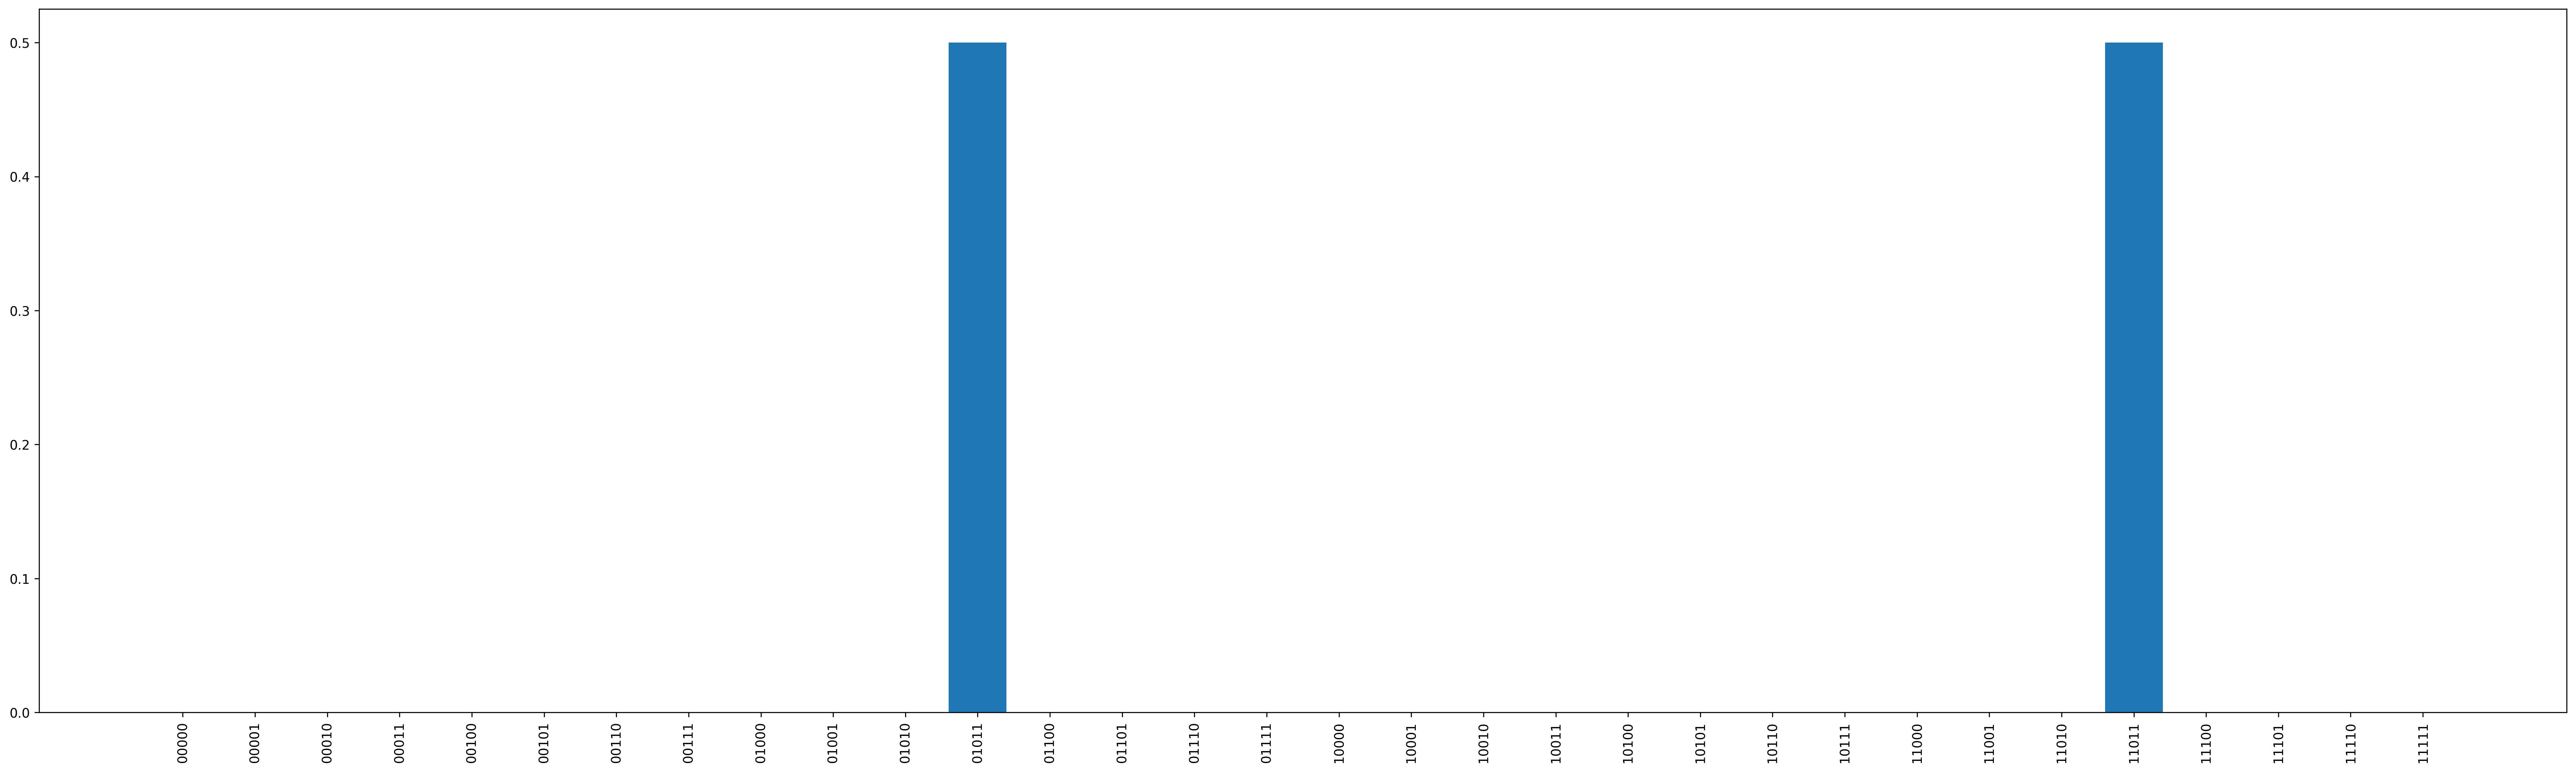

In [18]:
binstr = []
for i in range(2**(len(s)+1)):
  byt = bin(i)[2:].zfill(len(s)+1)
  binstr.append(byt)
plt.figure(figsize= (35,10), dpi= (300))
plt.xticks(rotation=90)
plt.bar(binstr, o)